<a href="https://colab.research.google.com/github/AnishBehera05/Predictive_analysis/blob/main/Predicting_Apple_Stock_Prices_with_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Apple stock price data
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [ ]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [ ]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(train[['Close']])
train_scaled = scaler.transform(train[['Close']])
test_scaled = scaler.transform(test[['Close']])

In [ ]:
# Prepare data for SVR
X_train, y_train = [], []
X_test, y_test = [], []

In [ ]:
# Create sequences of historical prices
look_back = 20  # Adjust as needed
for i in range(look_back, len(train_scaled)):
    X_train.append(train_scaled[i - look_back:i, 0])
    y_train.append(train_scaled[i, 0])

In [ ]:
for i in range(look_back, len(test_scaled)):
    X_test.append(test_scaled[i - look_back:i, 0])
    y_test.append(test_scaled[i, 0])

In [ ]:
# Ensure X_test and y_test have the same length
test = test.iloc[look_back:]
test_index = test.index

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
# SVR model with regularization
svr_model = SVR(kernel='rbf', C=2000, gamma=0.001, epsilon=0.001)  # Adjust C, gamma, and epsilon as needed
svr_model.fit(X_train, y_train)

SVR(C=2000, epsilon=0.001, gamma=0.001)

In [ ]:
# Predictions
predictions = svr_model.predict(X_test)

In [ ]:
# Inverse scaling
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).ravel()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

In [ ]:
# Evaluate SVR model
error = mean_squared_error(y_test, predictions)
print('SVR Mean Squared Error:', error)

SVR Mean Squared Error: 5.989743660755122


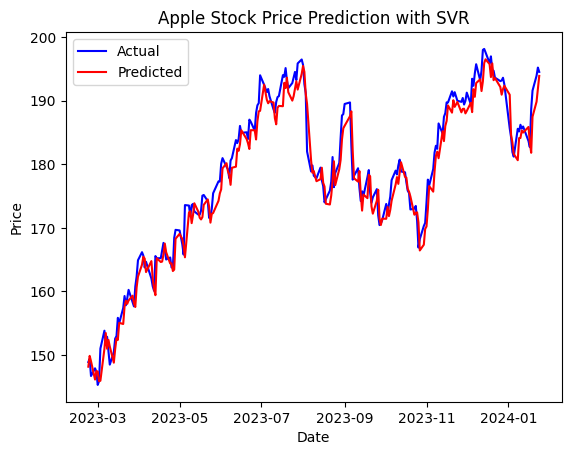

In [ ]:
# Visualize predictions
plt.plot(test_index, y_test, color='blue', label='Actual')
plt.plot(test_index, predictions, color='red', label='Predicted')
plt.title('Apple Stock Price Prediction with SVR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()